<a href="https://colab.research.google.com/github/ryannemilligan/Parkinsons-Lifestyle-Analysis/blob/main/Parkinsons_Lifestyle_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parkinson’s Disease Risk Factors Explorer

In this project, I will explore how lifestyle, clinical, and cognitive variables relate to Parkinson’s Disease diagnosis. This project is especially meaningful to me, as my grandfather, Fred O’Brien, battled Parkinson’s. His journey has fueled my passion for using data and AI to better understand this disease and improve patient outcomes.

## 1. Load Libraries and Dataset

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# setting style for plots so they are easy to read
sns.set(style="darkgrid")

# loading the dataset
df = pd.read_csv('/content/parkinsons_disease_data.csv')

# showing the first 5 lines of data so we can see what we are working with
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


## 2. Overview and Preprocessing

In [57]:
# print the number of row and columns to understand how big our dataset is
print("Shape:", df.shape)

# list of column names
print("\nColumns:", df.columns.tolist())

# checking for any missing data
print("\nMissing values:\n", df.isnull().sum())

# a count of how many patients have Parksinson's (1) and those that don't (0) (binary)
df['Diagnosis'].value_counts()

# checking for for duplicate rows
print("Duplicates:", df.duplicated().sum())

Shape: (2105, 35)

Columns: ['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis', 'DoctorInCharge']

Missing values:
 PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertensi

## 3. Exploratory Data Analysis (EDA)

In [58]:
# removing DoctorInCharge column for heatmap (non-numerical)
df_numeric = df.drop(columns=['DoctorInCharge'])

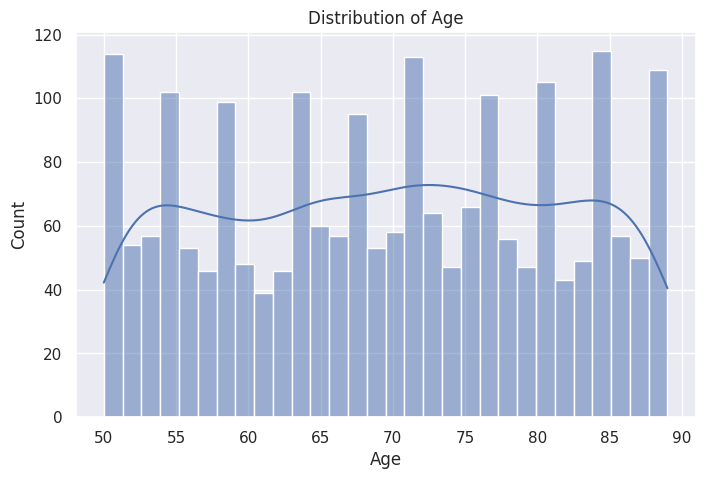

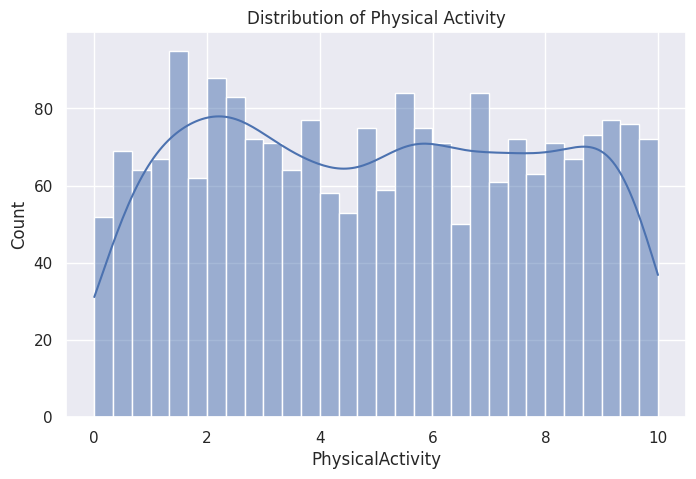

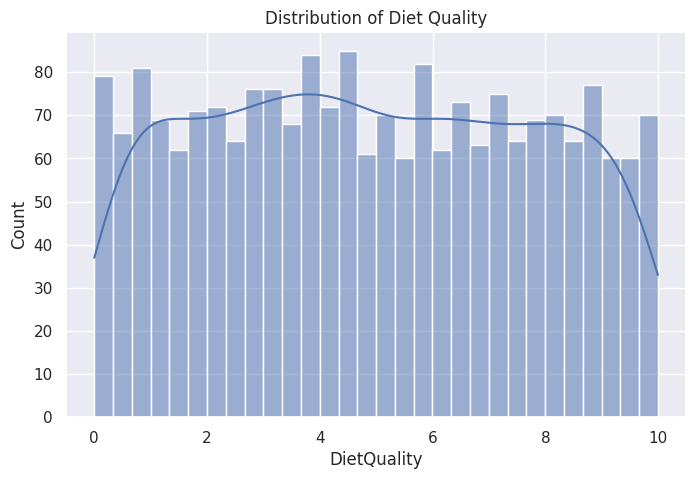

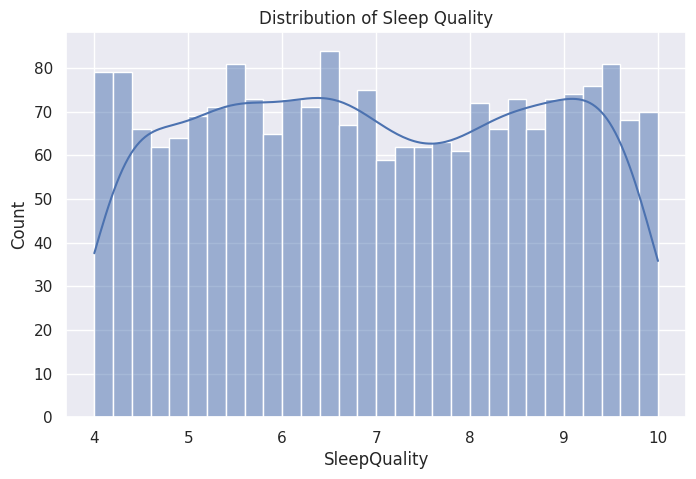

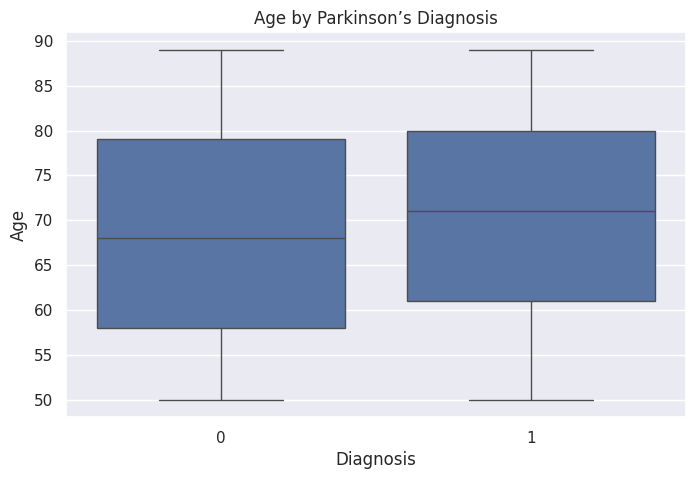

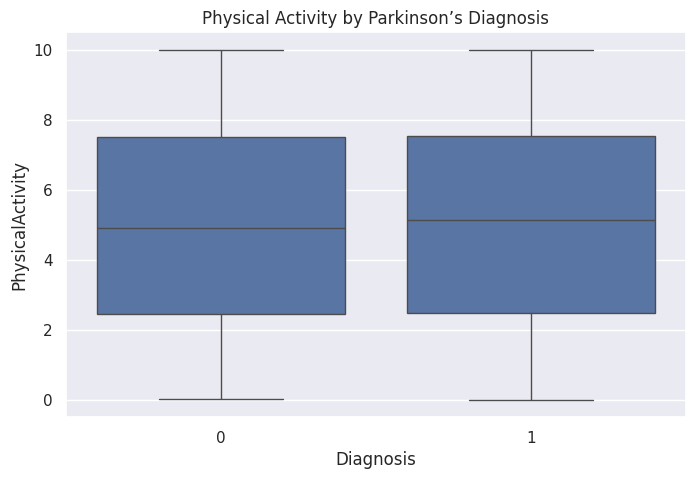

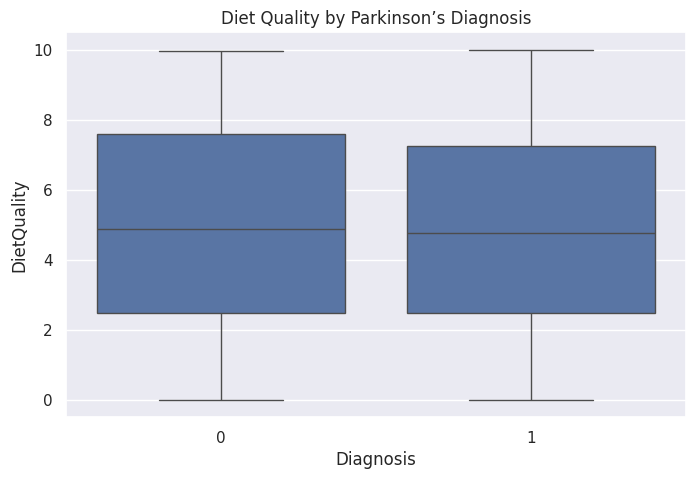

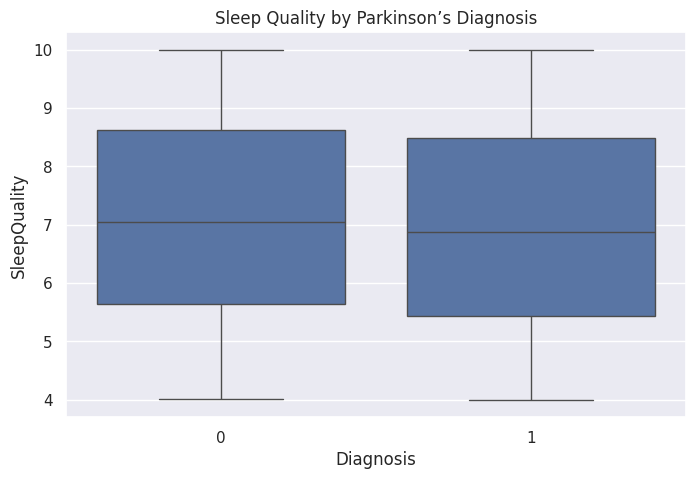

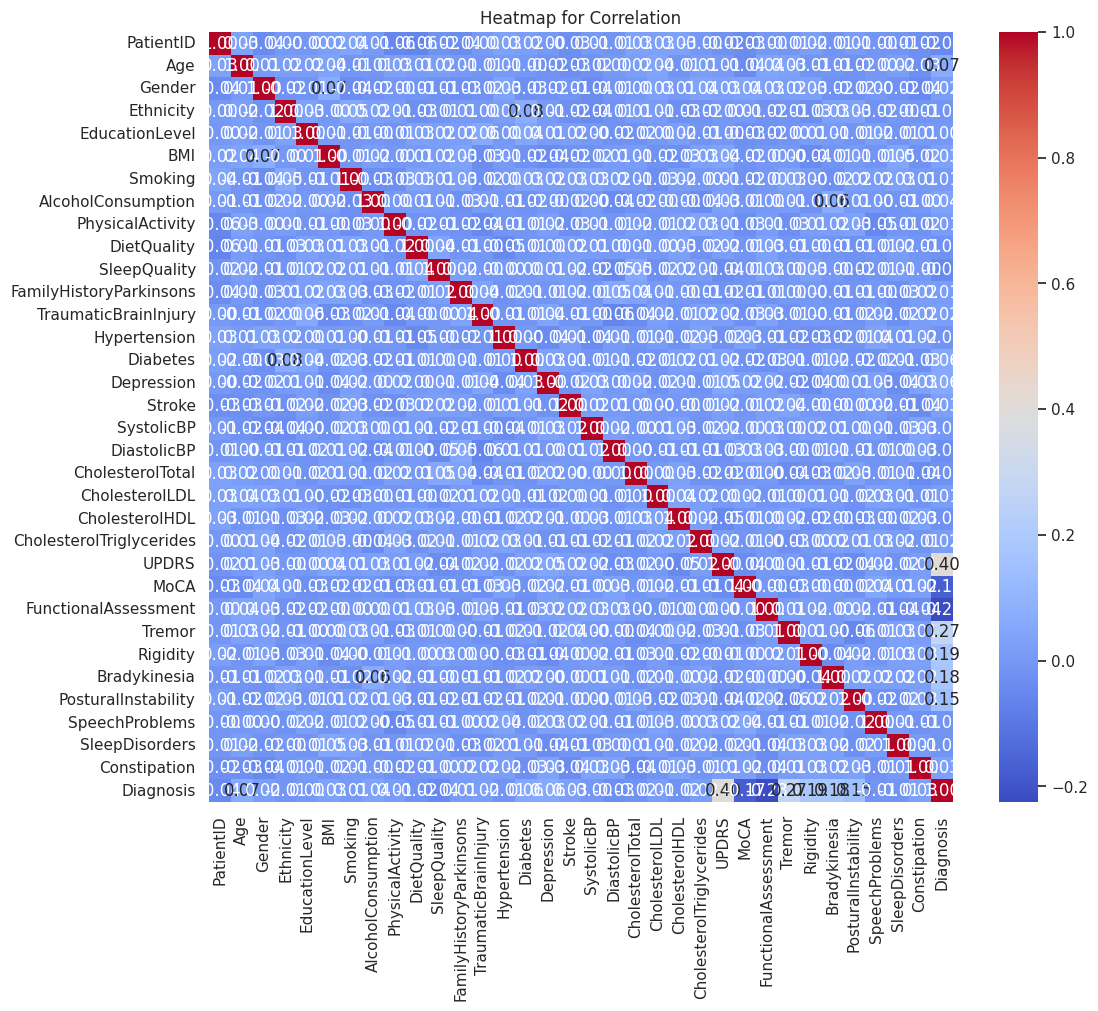

In [59]:
# basic statistics for numeric columns
df.describe()

# plot histogram for age
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

# plot histogram for PhysicalActivity
plt.figure(figsize=(8,5))
sns.histplot(df['PhysicalActivity'], bins=30, kde=True)
plt.title('Distribution of Physical Activity')
plt.show()

# plot histogram for DietQuality
plt.figure(figsize=(8,5))
sns.histplot(df['DietQuality'], bins=30, kde=True)
plt.title('Distribution of Diet Quality')
plt.show()

# plot histogram for SleepQuality
plt.figure(figsize=(8,5))
sns.histplot(df['SleepQuality'], bins=30, kde=True)
plt.title('Distribution of Sleep Quality')
plt.show()

# boxplot diagnosis by age
plt.figure(figsize=(8,5))
sns.boxplot(x='Diagnosis', y='Age', data=df)
plt.title('Age by Parkinson’s Diagnosis')
plt.show()

# boxplot diagnosis by PhysicalActivity
plt.figure(figsize=(8,5))
sns.boxplot(x='Diagnosis', y='PhysicalActivity', data=df)
plt.title('Physical Activity by Parkinson’s Diagnosis')
plt.show()

# boxplot diagnosis by DietQuality
plt.figure(figsize=(8,5))
sns.boxplot(x='Diagnosis', y='DietQuality', data=df)
plt.title('Diet Quality by Parkinson’s Diagnosis')
plt.show()

# boxplot diagnosis by SleepQuality
plt.figure(figsize=(8,5))
sns.boxplot(x='Diagnosis', y='SleepQuality', data=df)
plt.title('Sleep Quality by Parkinson’s Diagnosis')
plt.show()

# creating heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap for Correlation')
plt.show()

## 4. Statistical Tests

In [60]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# Age and Diagnosis

group1 = df[df['Diagnosis'] == 1]['Age']
group0 = df[df['Diagnosis'] == 0]['Age']

t_stat, p_val = ttest_ind(group1, group0)

print(f"Age: t-statistic={t_stat:.3f} p-value = {p_val:.3f}")

#
contingency_table = pd.crosstab(df['Tremor'], df['Diagnosis'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Tremor: chi2 = {chi2:.3f}, p-value = {p:.3f}")

Age: t-statistic=3.003 p-value = 0.003
Tremor: chi2 = 157.323, p-value = 0.000


In [61]:
# check for multicollinearity using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

features = df_numeric.drop(columns=['Diagnosis', 'PatientID'])

vif_data = pd.DataFrame()
vif_data['feature'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

print(vif_data.sort_values(by="VIF", ascending=False))

                     feature        VIF
0                        Age  31.312601
18          CholesterolTotal  24.776004
17               DiastolicBP  24.756027
16                SystolicBP  23.157039
9               SleepQuality  15.842791
4                        BMI  14.568354
19            CholesterolLDL   9.181712
20            CholesterolHDL   7.412721
21  CholesterolTriglycerides   5.726473
22                     UPDRS   4.212560
6         AlcoholConsumption   4.075962
7           PhysicalActivity   4.017973
23                      MoCA   4.012135
8                DietQuality   3.933819
24      FunctionalAssessment   3.926687
3             EducationLevel   3.234748
1                     Gender   2.009821
25                    Tremor   1.777098
2                  Ethnicity   1.500075
5                    Smoking   1.444759
31              Constipation   1.442606
29            SpeechProblems   1.433205
26                  Rigidity   1.352749
30            SleepDisorders   1.342240


In [62]:
# cleaning dataset

cols_to_drop = [
    'DoctorInCharge',        # placeholder column, all same value
    'DiastolicBP',           # highly correlated with SystolicBP
    'CholesterolLDL',        # highly correlated with Total
    'CholesterolHDL',        # highly correlated with Total
    'CholesterolTriglycerides'  # highly correlated with Total
]

df_clean = df.drop(columns=cols_to_drop)

# verifying new feature set

print("New shape:", df_clean.shape)
print("\nRemaining columns:\n", df_clean.columns.tolist())

New shape: (2105, 30)

Remaining columns:
 ['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP', 'CholesterolTotal', 'UPDRS', 'MoCA', 'FunctionalAssessment', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis']


## 5. Predictive Modeling

Accuracy: 0.815
Precision: 0.838
Recall: 0.87
F1 Score: 0.853
ROC AUC: 0.899


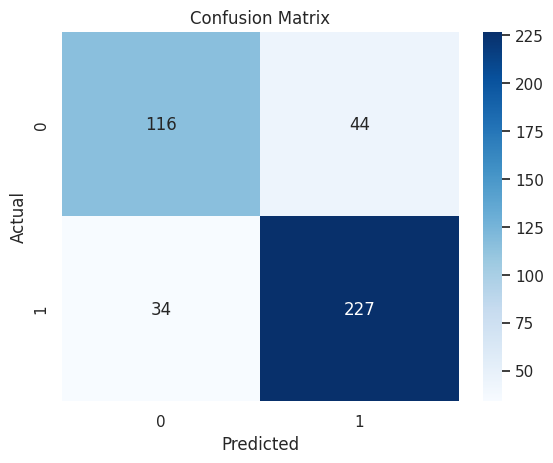

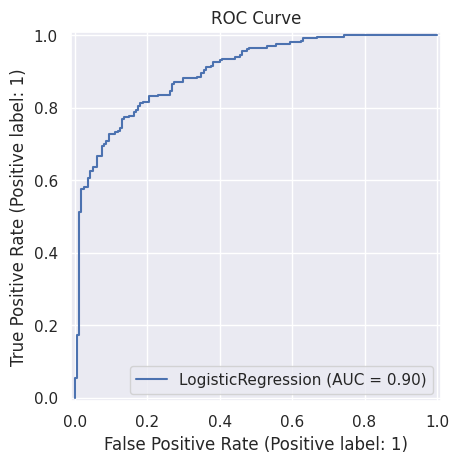

In [63]:
# modeling imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, RocCurveDisplay)

# defining features (X) and target (y)
X = df_clean.drop(columns=['Diagnosis', 'PatientID'])
y = df_clean['Diagnosis']

# train-test split (80& train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=42, stratify=y)

# feature scaling (helps models converge)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# training linear regression model
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(x_train_scaled, y_train)

# make the predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled) [:, 1]

# EVALUATE
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1 Score:", round(f1_score(y_test, y_pred), 3))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba).round(3))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve
RocCurveDisplay.from_estimator(log_reg, X_test_scaled, y_test)
plt.title('ROC Curve')
plt.show()


## 6. Insights & Export for Tableau

In [65]:
# final subset for Tableau

relevant_columns = [
    'PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel',
    'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
    'DietQuality', 'SleepQuality', 'FamilyHistoryParkinsons',
    'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression',
    'Stroke', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
    'UPDRS', 'MoCA', 'FunctionalAssessment',

    # core symptom indicators
    'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
    'SpeechProblems', 'SleepDisorders', 'Constipation',

    # target variable
    'Diagnosis'
]

df_export = df[relevant_columns]
df_export.to_csv("parkinsons_tableau_export.csv", index=False)